# Compare Features

## Imports

In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import six
from radiomics import featureextractor
from radiomics.imageoperations import getMask
from skimage import io as skio


In [2]:
%matplotlib inline


## Hyperparameters

In [3]:
PATH_SYNTHETIQUES = os.path.join(os.getcwd(), "..", "images", "synthetiques")
PATH_RESULTS_SYNTHETIQUES = os.path.join(os.getcwd(), "results_synthetiques")
PATH_RESULTS_BRUITS = os.path.join(os.getcwd(), "results_bruits")
PATH_RESULTS_GRADIENTS = os.path.join(os.getcwd(), "results_gradients")


In [4]:
np.random.seed(0)


## Function declarations

## Images Synthétiques

In [5]:
results = []
filenames = []

for file in os.listdir(PATH_RESULTS_SYNTHETIQUES):
    filename = os.fsdecode(file)
    if filename.endswith("_results.json"):
        filenames.append(filename[:-13])
        f = open(os.path.join(PATH_RESULTS_SYNTHETIQUES, filename))
        result = json.load(f)
        results.append(result)

featuresSet = []
keysSet = []

for result in results:
    features = np.array([])
    keys = np.array([])

    for key, value in six.iteritems(result):
        if key.startswith("original_"):
            features = np.append(features, result[key])
            keys = np.append(keys, key)

    featuresSet.append(features)
    keysSet.append(keys)


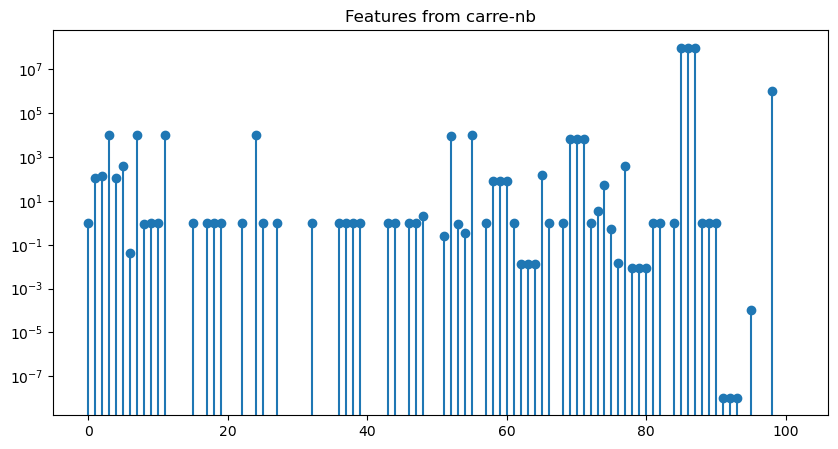

In [6]:
fig = plt.figure(figsize=(10, 5))

plt.stem(featuresSet[5])
plt.yscale("log")
plt.title("Features from %s" % filenames[5])

plt.show()


### Blur

In [7]:
ind = 0


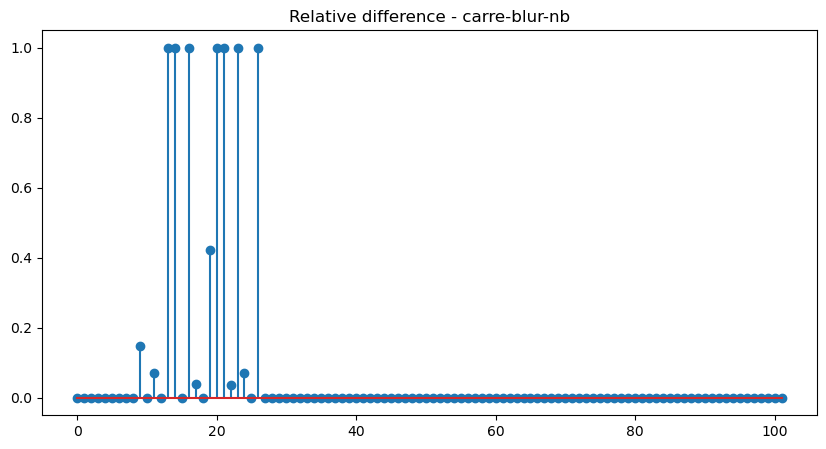

In [8]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(np.abs(featuresSet[ind]) > 1e-8, np.ones_like(featuresSet[5]), np.zeros_like(featuresSet[5])),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()


In [9]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)):]], sep="\n")


original_firstorder_RootMeanSquared
original_firstorder_Mean
original_firstorder_TotalEnergy
original_firstorder_Energy
original_firstorder_10Percentile
original_firstorder_Minimum
original_firstorder_InterquartileRange
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_Skewness
original_firstorder_Variance
original_firstorder_Kurtosis


### BN

In [10]:
ind = 1


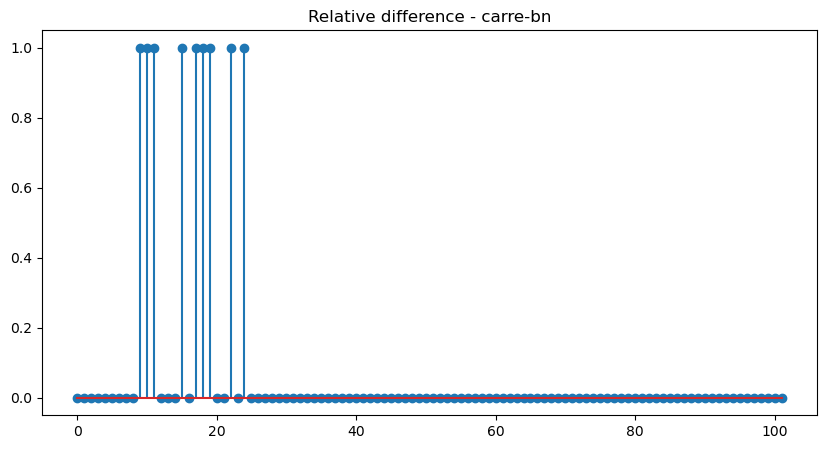

In [11]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(np.abs(featuresSet[ind]) > 1e-8, np.ones_like(featuresSet[5]), np.zeros_like(featuresSet[5])),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()


In [12]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)):]], sep="\n")


original_firstorder_Mean
original_firstorder_Median
original_firstorder_Energy
original_firstorder_90Percentile
original_firstorder_10Percentile
original_firstorder_Minimum
original_firstorder_RootMeanSquared
original_firstorder_Maximum
original_firstorder_TotalEnergy


### Dent

In [13]:
ind = 2


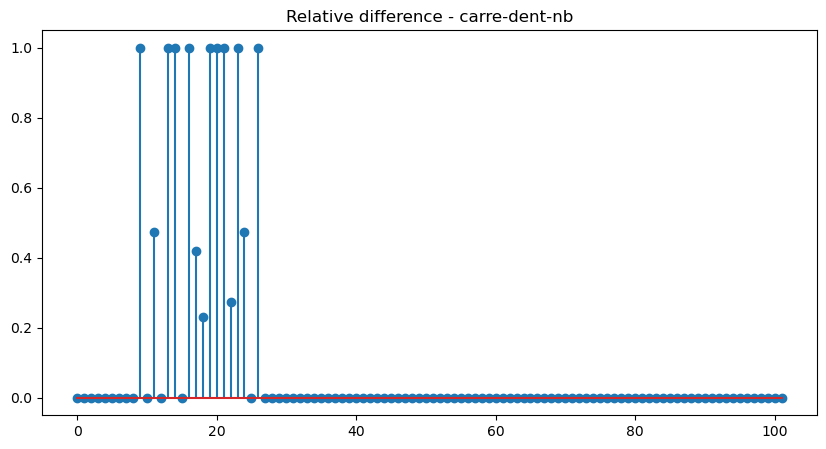

In [14]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(np.abs(featuresSet[ind]) > 1e-8, np.ones_like(featuresSet[5]), np.zeros_like(featuresSet[5])),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()


In [15]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)):]], sep="\n")


original_firstorder_Median
original_firstorder_RootMeanSquared
original_firstorder_Mean
original_firstorder_Energy
original_firstorder_TotalEnergy
original_firstorder_10Percentile
original_firstorder_Skewness
original_firstorder_Range
original_firstorder_InterquartileRange
original_firstorder_Variance
original_firstorder_Kurtosis
original_firstorder_Minimum
original_firstorder_MeanAbsoluteDeviation
original_firstorder_RobustMeanAbsoluteDeviation


### Frost

In [16]:
ind = 3


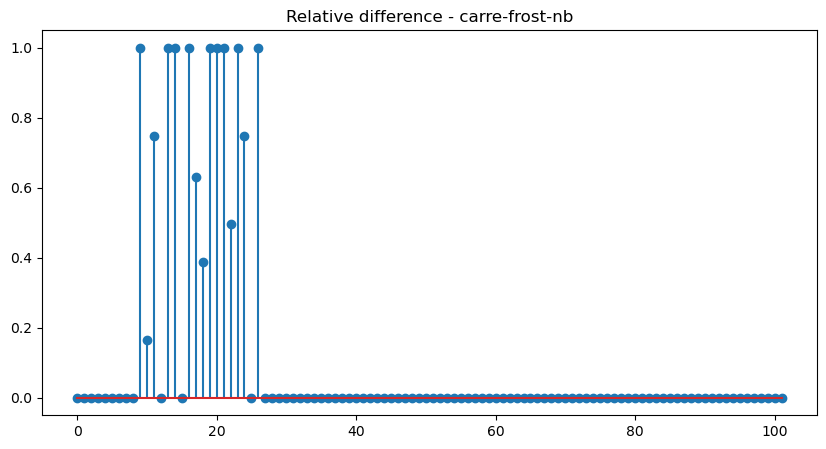

In [17]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(np.abs(featuresSet[ind]) > 1e-8, np.ones_like(featuresSet[5]), np.zeros_like(featuresSet[5])),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()


In [18]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)):]], sep="\n")


original_firstorder_90Percentile
original_firstorder_Median
original_firstorder_RootMeanSquared
original_firstorder_Mean
original_firstorder_TotalEnergy
original_firstorder_Energy
original_firstorder_Skewness
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_InterquartileRange
original_firstorder_Variance
original_firstorder_Kurtosis
original_firstorder_Range
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Minimum
original_firstorder_10Percentile


### Grad

In [19]:
ind = 4


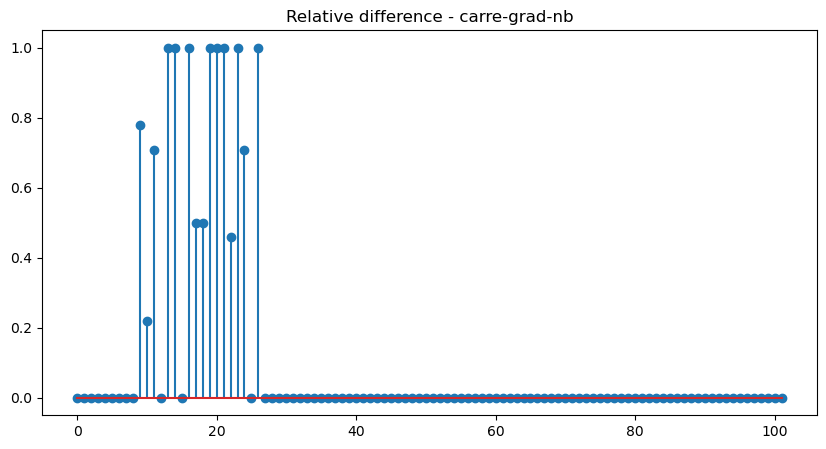

In [20]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(np.abs(featuresSet[ind]) > 1e-8, np.ones_like(featuresSet[5]), np.zeros_like(featuresSet[5])),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()


In [21]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)):]], sep="\n")


original_firstorder_90Percentile
original_firstorder_RootMeanSquared
original_firstorder_Median
original_firstorder_Mean
original_firstorder_TotalEnergy
original_firstorder_Energy
original_firstorder_10Percentile
original_firstorder_Skewness
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_InterquartileRange
original_firstorder_Variance
original_firstorder_Kurtosis
original_firstorder_Range
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Minimum


### NG

In [22]:
ind = 6


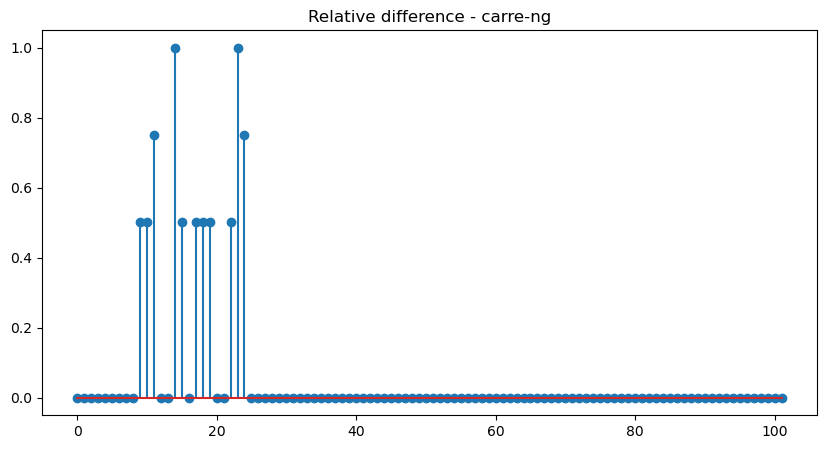

In [23]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(np.abs(featuresSet[ind]) > 1e-8, np.ones_like(featuresSet[5]), np.zeros_like(featuresSet[5])),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()


In [24]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)):]], sep="\n")


original_firstorder_Mean
original_firstorder_Minimum
original_firstorder_Maximum
original_firstorder_RootMeanSquared
original_firstorder_90Percentile
original_firstorder_10Percentile
original_firstorder_Median
original_firstorder_TotalEnergy
original_firstorder_Energy
original_firstorder_Skewness
original_firstorder_Kurtosis


### Noise

In [25]:
ind = 7


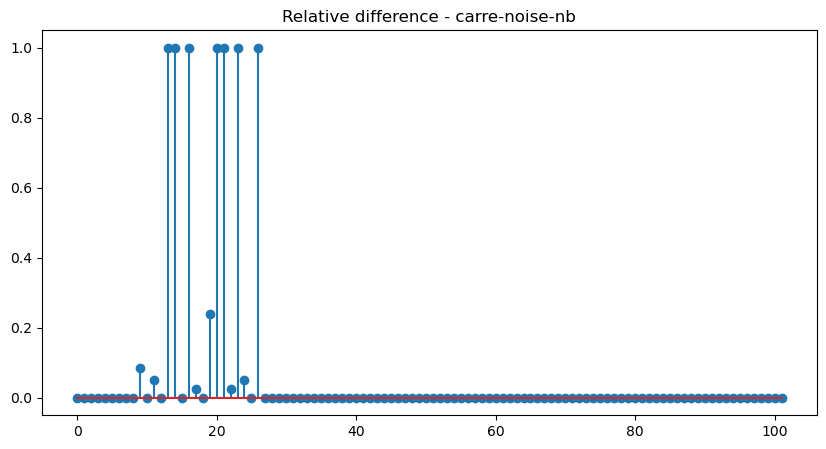

In [26]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(np.abs(featuresSet[ind]) > 1e-8, np.ones_like(featuresSet[5]), np.zeros_like(featuresSet[5])),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()


In [27]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)):]], sep="\n")


original_firstorder_RootMeanSquared
original_firstorder_Mean
original_firstorder_TotalEnergy
original_firstorder_Energy
original_firstorder_10Percentile
original_firstorder_Minimum
original_firstorder_InterquartileRange
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_Skewness
original_firstorder_Variance
original_firstorder_Kurtosis


## Images Gradients

In [28]:
results = []
filenames = []

for file in os.listdir(PATH_RESULTS_GRADIENTS):
    filename = os.fsdecode(file)
    if filename.endswith("_results.json"):
        filenames.append(filename[:-13])
        f = open(os.path.join(PATH_RESULTS_GRADIENTS, filename))
        result = json.load(f)
        results.append(result)

featuresSet = []
keysSet = []

for result in results:
    features = np.array([])
    keys = np.array([])

    for key, value in six.iteritems(result):
        if key.startswith("original_"):
            features = np.append(features, result[key])
            keys = np.append(keys, key)

    featuresSet.append(features)
    keysSet.append(keys)


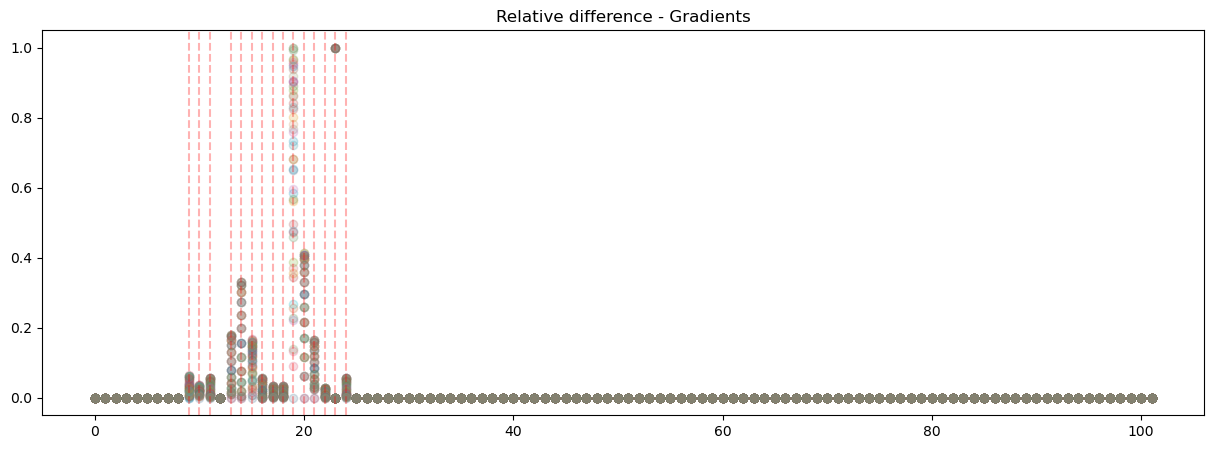

In [29]:
fig = plt.figure(figsize=(15, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresSet[0],
            featuresSet[0],
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresSet[0]),
                np.zeros_like(featuresSet[0]),
            ),
            where=(np.abs(featuresSet[0]) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, label=filenames[i], alpha=0.1)

inds = [9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
for xc in inds:
    plt.axvline(x=xc, color="red", ls="--", alpha = 0.3)

plt.title("Relative difference - Gradients")

plt.show()


In [30]:
print(*keysSet[0][inds], sep="\n")


original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_InterquartileRange
original_firstorder_Kurtosis
original_firstorder_Maximum
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Mean
original_firstorder_Median
original_firstorder_Minimum
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_RootMeanSquared
original_firstorder_Skewness
original_firstorder_TotalEnergy


## Images Bruit

In [31]:
results = []
filenames = []

for file in os.listdir(PATH_RESULTS_BRUITS):
    filename = os.fsdecode(file)
    if filename.endswith("_results.json"):
        filenames.append(filename[:-13])
        f = open(os.path.join(PATH_RESULTS_BRUITS, filename))
        result = json.load(f)
        results.append(result)

featuresSet = []
keysSet = []

for result in results:
    features = np.array([])
    keys = np.array([])

    for key, value in six.iteritems(result):
        if key.startswith("original_"):
            features = np.append(features, result[key])
            keys = np.append(keys, key)

    featuresSet.append(features)
    keysSet.append(keys)


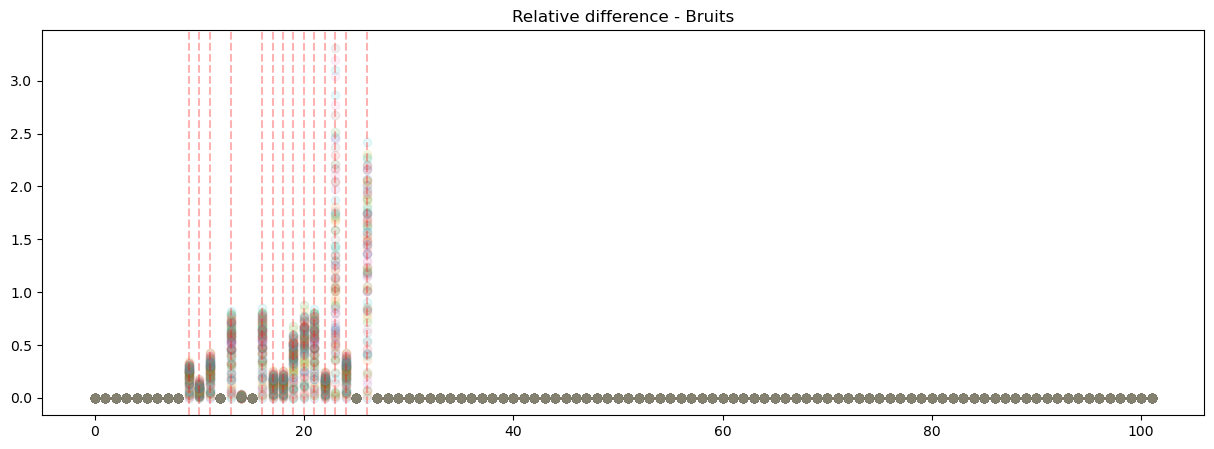

In [32]:
fig = plt.figure(figsize=(15, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresSet[0],
            featuresSet[0],
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresSet[0]),
                np.zeros_like(featuresSet[0]),
            ),
            where=(np.abs(featuresSet[0]) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, label=filenames[i], alpha=0.1)

inds = [9, 10, 11, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26]
for xc in inds:
    plt.axvline(x=xc, color="red", ls="--", alpha = 0.3)

plt.title("Relative difference - Bruits")

plt.show()


In [33]:
print(*keysSet[0][inds], sep="\n")


original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_InterquartileRange
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Mean
original_firstorder_Median
original_firstorder_Minimum
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_RootMeanSquared
original_firstorder_Skewness
original_firstorder_TotalEnergy
original_firstorder_Variance
